# 회귀 분석용 가상 데이터 생성 방법

Scikit-learn 의 datasets 서브 패키지에는 회귀 분석 시험용 가상 데이터를 생성하는 명령어인 `make_regression()` 이 있다. 

* http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html


## 입출력 요소

`make_regression()`는 다음과 같은 입출력 요소를 가진다.

* 입력 
 * `n_samples` : 정수 (옵션, 디폴트 100)
    * 표본의 갯수
 * `n_features` : 정수 (옵션, 디폴트 100)
    * 독립 변수(feature)의 수(차원)
 * `n_targets` : 정수 (옵션, 디폴트 1)
    * 종속 변수(target)의 수(차원)
 * `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
 * `effective_rank`: 정수 또는 None (옵션, 디폴트 None)
    * 독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
 * `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 None이 아닌 경우 독립 변수간의 상관 관계 형태를 결정하는 변수
 * `bias` : 실수 (옵션, 디폴트 0.0)
    * 절편
 * `noise` : 실수 (옵션, 디폴트 0.0)
    * 출력 즉, 종속 변수에 더해지는 정규 분포의 표준 편차
 * `coef` : 불리언 (옵션, 디폴트 False)
   * True 이면 선형 모형의 계수도 출력
 * `random_state` : 정수 (옵션, 디폴트 None)
   * 난수 발생용 시작값 


* 출력
 * `X` : [`n_samples`, `n_features`] 형상의 2차원 배열
    * 독립 변수의 표본 데이터
 * `y` : [`n_samples`] 형상의 1차원 배열 또는 [`n_samples`, `n_targets`] 형상의 2차원 배열
    * 종속 변수의 표본 데이터
 * `coef` : [`n_features`] 형상의 1차원 배열 또는 [`n_features`, `n_targets`] 형상의 2차원 배열 (옵션)
    * 선형 모형의 계수, 입력 인수 `coef`가 True 인 경우에만 출력됨

예를 들어 독립 변수가 1개, 종속 변수가 1개 즉, 선형 모형이 다음과 같은 수식은 경우 

$$ y = C_0 + C_1 x + e $$

이러한 관계를 만족하는 표본 데이터는 다음과 같이 생성한다.

In [7]:
from sklearn.datasets import make_regression

X
 [[ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [ 0.95008842]
 [ 1.76405235]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.40015721]
 [-0.10321885]
 [-0.15135721]]
y
 [  77.48913677  177.41712535  147.85924209   75.22087885  139.66444108
   32.50811146  -77.37353667   31.6814481    -8.17209494  -11.98332915]
c
 79.1725038083


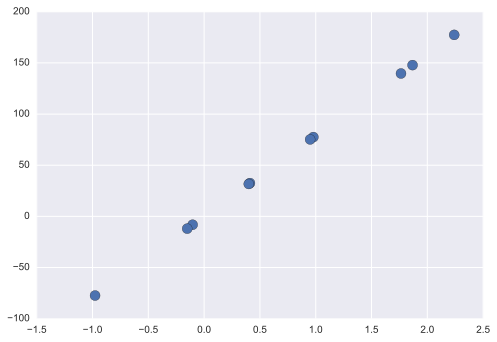

In [50]:
X, y, c = make_regression(n_samples=10, n_features=1, bias=0, noise=0, coef=True, random_state=0)
print("X\n", X)
print("y\n", y)
print("c\n", c)
plt.scatter(X, y, s=100)
plt.show()

위 선형 모형은 다음과 같다.

$$
y = 100 + 79.1725 x 
$$

`noise` 인수를 증가시키면 $\text{Var}[e]$가 증가하고 `bias` 인수를 증가시키면 y 절편이 증가한다.

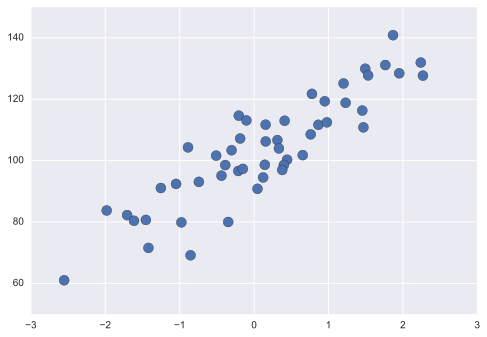

In [51]:
X, y, c = make_regression(n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.show()

이번에는 `n_features` 즉, 독립 변수가 2개인 표본 데이터를 생성하여 스캐터 플롯을 그리면 다음과 같다. 종속 변수 값은 점의 명암으로 표시하였다.

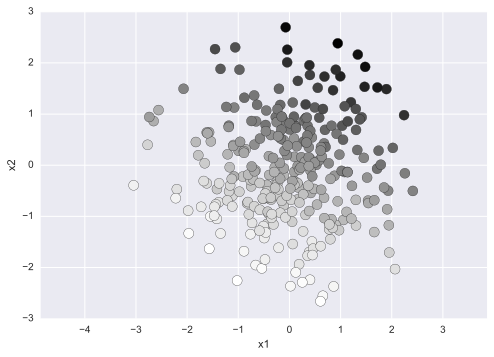

In [68]:
X, y, c = make_regression(n_samples=300, n_features=2, noise=10, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

만약 실제로 y값에 영향을 미치는 종속 변수는 하나 뿐이라면 다음과 같이 사용한다.

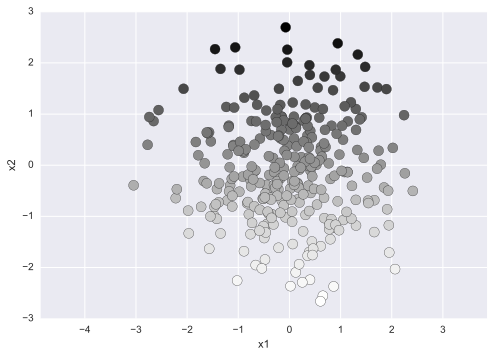

In [69]:
X, y, c = make_regression(n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

만약 두 종속 변수가 상관관계가 있다면 다음과 같이 생성하고 스캐터 플롯에서도 이를 알아볼 수 있다.

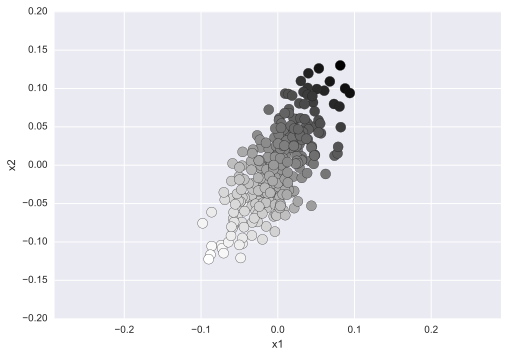

In [74]:
X, y, c = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

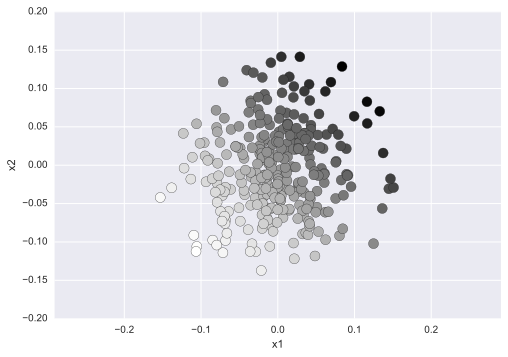

In [72]:
X, y, c = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, tail_strength=1, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()